# Applied Statistics Final Project
## Ronald Adomako
12/9/19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.regression.linear_model as sm
import statsmodels.api as smApi
from statsmodels.formula.api import ols

import cartopy.crs as ccrs
import geopandas as gpd
import cartopy.io.shapereader as shpreader

%matplotlib inline

In [2]:
column = ["year", "month", "day", "hour", "LAT", "LON", "ISST","OSST",
 "OERR", "SI", "ICflag", "DS", "VS", "WDIR", "WSPD", "SLP",
 "AT", "WBT", "DPT", "CLT", "CLL"]
len(column)

21

In [3]:
DB = pd.read_csv("DB_33944.csv", names = column)
MB = pd.read_csv("MB_62413.csv", names = column)
SH = pd.read_csv("SH_GDLS.csv", names = column)

# Mooring Buoy

In [4]:
'''High Quality Flags'''

HQ_MB = sum(MB['ICflag']==1)
print(HQ_MB)

9207


In [5]:
'''Low Quality Flags'''

total_MB = MB['ICflag'].count()
LQ_MB = total_MB - HQ_MB
print(LQ_MB)

19


In [6]:
print('High quality flag percentage of mooring buoys: %f'%round(100*(HQ_MB/total_MB),2)+'%')

High quality flag percentage of mooring buoys: 99.790000%


In [7]:
MB.head()

,year,month,day,hour,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
0,1991,11,18,12,51.9,3.2,10.6,10.83,0.35,NaN,...,0.0,0.0,190.0,8.7,999.1,11.1,NaN,11.0,NaN,NaN
1,1991,11,18,22,51.9,3.2,10.6,10.83,0.35,NaN,...,0.0,0.0,160.0,6.7,998.0,10.4,NaN,9.8,NaN,NaN
2,1991,11,18,23,51.9,3.2,10.6,10.83,0.35,NaN,...,0.0,0.0,160.0,7.7,998.0,10.4,NaN,10.3,NaN,NaN
3,1991,11,19,6,51.9,3.2,10.7,10.37,0.32,NaN,...,0.0,0.0,90.0,8.2,999.5,9.8,NaN,9.7,NaN,NaN
4,1991,11,19,12,51.9,3.2,10.6,10.37,0.32,NaN,...,0.0,0.0,50.0,13.9,1004.1,8.1,NaN,7.9,NaN,NaN


### Data clean and investigate low quality flags

In [8]:
MB[MB['ICflag']==0]

,year,month,day,hour,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
465,1992,4,11,17,51.9,3.2,23.5,7.43,0.26,NaN,...,0.0,0.0,NaN,NaN,1017.1,12.6,NaN,3.9,NaN,NaN
1804,1993,4,15,3,0.0,3.2,7.1,28.49,0.32,NaN,...,0.0,0.0,20.0,8.2,1015.4,7.2,6.9,5.7,NaN,NaN
1837,1993,4,22,15,0.0,3.2,7.9,28.83,0.41,NaN,...,0.0,0.0,240.0,6.7,1007.1,9.3,8.9,8.1,NaN,NaN
1839,1993,4,23,16,0.0,3.2,8.0,28.79,0.41,NaN,...,0.0,0.0,120.0,5.1,1005.1,12.6,11.0,9.2,NaN,NaN
1845,1993,4,25,9,0.0,3.2,8.2,28.30,0.32,NaN,...,0.0,0.0,210.0,7.2,1004.0,9.2,9.2,8.8,NaN,NaN
1852,1993,4,27,16,0.0,3.2,8.4,28.36,0.47,NaN,...,0.0,0.0,20.0,12.3,1017.9,10.0,9.3,8.0,NaN,NaN
1893,1993,5,7,9,0.0,3.2,9.1,28.15,0.33,NaN,...,0.0,0.0,30.0,11.8,1025.7,9.8,8.3,6.4,NaN,NaN
1906,1993,5,9,3,0.0,3.2,9.2,28.11,0.33,NaN,...,0.0,0.0,40.0,8.2,1019.9,10.4,9.7,8.3,NaN,NaN
2087,1993,6,22,4,0.0,3.2,13.9,25.81,0.35,NaN,...,0.0,0.0,10.0,4.6,1017.5,13.6,12.3,10.5,NaN,NaN
2108,1993,6,26,9,0.0,3.2,14.2,25.45,0.33,NaN,...,0.0,0.0,210.0,5.7,1020.0,15.0,14.5,13.8,NaN,NaN


#### The year 1993 primarily accounts for the low quality flags, and even so, a few data points out of its entire year. 

Also, note that all the Longitude and Latitude measurements are present for the low quality flags. The NaN (not a number) values are coming from the high quality flags.  We can use pandas dataframe to drop these values and with high confidence that we will still obtain reliable results– see that there are only a few rows of these missing values.

In [9]:
MB2 = MB[["year", "LAT", "LON", "ISST","OSST",
 "OERR", "ICflag"]].dropna()
missing = MB["ISST"].count() - MB2["ISST"].count()
print('number of data missing is: ',missing,'from ISST')
missing = MB['OSST'].count() - MB2['OSST'].count()
print('number of data missing is: ',missing,'from OSST')

number of data missing is:  1 from ISST
number of data missing is:  0 from OSST


### Let's see if our Mooring Buoy is still.

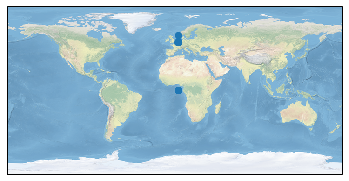

In [10]:
x = np.array(MB2['LON']) 
y = np.array(MB2['LAT'])

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.scatter(x,y);  

### Separate Mooring Buoys

In [11]:
years = {}
array = np.array(MB2[["year","LAT", "LON"]])

for row in array:
    key = int(row[0])
    value = (row[1],row[2])
    if key not in years:
        years[key]=[]
    if value not in years[key]:
        years[key].append(value)
print(years)
    


{1991: [(51.9, 3.2), (59.5, 3.2)], 1992: [(51.9, 3.2), (51.9, 2.5)], 1993: [(51.9, 3.2), (0.0, 3.2), (59.5, 3.2), (51.5, 3.2), (51.9, 3.5)], 1994: [(51.9, 3.2), (51.9, 3.6), (53.2, 3.2)], 1995: [(51.9, 3.2), (52.9, 3.2)], 1996: [(51.9, 3.2)]}


In [12]:
for key in years:
    print('key: %i' %key, ', no. of locations: %d' %len(years[key]))

key: 1991 , no. of locations: 2
key: 1992 , no. of locations: 2
key: 1993 , no. of locations: 5
key: 1994 , no. of locations: 3
key: 1995 , no. of locations: 2
key: 1996 , no. of locations: 1


NameError: name 'year' is not defined

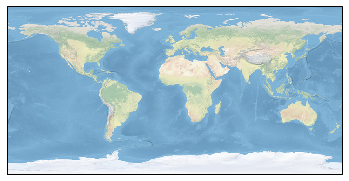

In [13]:
df = MB2
x = np.array(df['LON']) 
y = np.array(df['LAT'])

_ = plt.subplots()
_ = plt.axes(projection=ccrs.PlateCarree())
_ .stock_img()
_ = plt.title('%i\'s stations for Mooring Buoy' %year)
_ = plt.scatter(x,y);

In [ ]:
for year in years:
    _ = None
    df = MB2[MB2['year']==year]
    x = np.array(df['LON']) 
    y = np.array(df['LAT'])
    
    _ = plt.subplots()
    _ = plt.axes(projection=ccrs.PlateCarree())
    _ .stock_img()
    _ = plt.title('%i\'s stations for Mooring Buoy' %year)
    _ = plt.scatter(x,y); 

In [ ]:
for year in years:
    _ = None
    df = MB2[MB2['year']==year]
    x = np.array(df['LON']) 
    y = np.array(df['LAT'])
    
    _ = plt.subplots()
    _ = plt.axes(projection=ccrs.PlateCarree())
    _ .stock_img()
    _ = plt.title('%i\'s stations for Mooring Buoy' %year)
    _ = plt.scatter(x,y,alpha=0.1); 

Applying an alpha = 0.1 shows that the year 1993 is the only year that has multiple stationed buoys. By inspection this year has two different buoys for this year while the rest has only one.  The plots for the others years can be considered as "wiggle" or error in the data as there are not a significant  number of points to display a mark.

In [ ]:
x_MB=np.array(MB['OSST']) 
y_MB=np.array(MB['ISST'])

### By inspection there are two 1993s: 1993A (51.9°, 3.2°) and 1993B (0°, 3.2°)

We can run a hypothesis test on this assumption by comparing the difference between their means. Noting that all of the clean data agrees with a 3.2º line of longitude. We will take any latitude measurement above 25º as belonging to 1993A and measurements below 25º belonging to 1993B. We can run this test for both OSST and ISST. We will assume a normal distribution of data and for each 1993s we will compare the mean for the entire data set to the mean of the assumed location. Our confidence interval will be 95%.

In [ ]:
def mean_iid_plot(dist):
    mean = float(np.array(dist).ravel().mean())
    print('The average is: ', round(mean,3))
    print(dist.count(), ' is the number of points.')

    fig, ax = plt.subplots(ncols=1, nrows =1, figsize=(15, 5),
                    constrained_layout=True, sharey = True, sharex = True);
    ax = plt.hist(dist.ravel(),bins=15,density = True,label = 'frequency');
    ax = plt.axvline(mean, color='r');
    return

## Begin with the ISST

In [ ]:
ISST_93A = MB2[MB2['year']==1993]
ISST_93A = ISST_93A[ISST_93A['LAT'] > 25]['ISST']
mean_iid_plot(ISST_93A)

In [ ]:
ISST_93B = MB2[MB2['year']==1993]
ISST_93B = ISST_93B[ISST_93B['LAT'] < 25]['ISST']
mean_iid_plot(ISST_93B)

In [ ]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(ISST_93A,ISST_93B)

if pval <0.05:
  print("we reject null hypothesis, where p-val is",pval)
else:
  print("we accept null hypothesis, where p-val is",pval)

#### As expected ISST 1993A and ISST 1993B are indeed different.  We did a hypothesis difference test with a 95% confidence interval.  Note that for 1993B there are few points in our count so the t-test was appropriate.

## Repeat for OSST

In [ ]:
OSST_93A = MB2[MB2['year']==1993]
OSST_93A = OSST_93A[OSST_93A['LAT'] > 25]['OSST']
mean_iid_plot(OSST_93A)

In [ ]:
OSST_93B = MB2[MB2['year']==1993]
OSST_93B = OSST_93B[OSST_93B['LAT'] < 25]['OSST']
mean_iid_plot(OSST_93B)

In [ ]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(OSST_93A,OSST_93B)
if pval <0.05:
  print("we reject null hypothesis, where p-val is",pval)
else:
  print("we accept null hypothesis, where p-val is",pval)

### Again, for similar reasons we are able to establish that there are two different MOORING BUOYS for 1993 under OSST measuring instrument.  This leads to further reliable results as ISST and OSST has different thresholds for measuring quality of measurement.  We are confident that 1993A and 1993B are different locations.  Now we can test for each location whether our filter criteria for longitude and latitude is representative of the pool of data or an aggregate of independent nearby measurements.  We will test whether coordinate (51.9°, 3.2°) is representative of 1993A  and whether coordinate (0°, 3.2°) is representative of 1993B.  We consider ISST measurements.

## Begin with 1993A

In [ ]:
ISST_93A_H0 = MB2[MB2['year']==1993]
ISST_93A_H0 = ISST_93A_H0[ISST_93A_H0['LON']==3.2]
ISST_93A_H0 = ISST_93A_H0[ISST_93A_H0['LAT']==51.9]['ISST']
mean_iid_plot(ISST_93A_H0)

In [ ]:
ISST_93A_HA = MB2[MB2['year']==1993]
ISST_93A_HA = ISST_93A_HA[ISST_93A_HA['LAT'] > 25]
ISST_93A_HA = ISST_93A_HA[(ISST_93A_HA['LAT']!=51.9)|(ISST_93A_HA['LON']!=3.2)]
ISST_93A_HA = ISST_93A_HA['ISST']
mean_iid_plot(ISST_93A_HA)

### Already it is clear that our filter and specifically the coordinate for 1993A is accurate. There aren't enough points to boot-strap a distribution for a null hypothesis test.  Coordinates that don't align with (51.9°, 3.2°) are spurious. We obtain the same results when running the script for OSST because the coordination of these points are chosen to match that of ISST– the data was cleaned to filter out rows that had missing values for either of these.  If there were a considerable amount of data that were dropped we could have done a statistical test on these as well to test the validity of our cleaning method.  The amount of data that were dropped is 1 row and that was from ISST: we didn't consider the OSST from that row. We dropped this row for uniformity of code and maintain reliability of representing the data provided.

In [ ]:
OSST_93A_HA = MB2[MB2['year']==1993]
OSST_93A_HA = OSST_93A_HA[OSST_93A_HA['LAT'] > 25]
OSST_93A_HA = OSST_93A_HA[(OSST_93A_HA['LAT']!=51.9)|(OSST_93A_HA['LON']!=3.2)]
OSST_93A_HA = OSST_93A_HA['OSST']
mean_iid_plot(OSST_93A_HA)

# Inspect 1993B

In [ ]:
ISST_93A_H0 = MB2[MB2['year']==1993]
ISST_93A_H0 = ISST_93A_H0[ISST_93A_H0['LON']==3.2]
ISST_93A_H0 = ISST_93A_H0[ISST_93A_H0['LAT']==0]['ISST']
mean_iid_plot(ISST_93A_H0)

### All the points in 1993B are represented by coordinate (0º,3.2º).  This case is trivial.  We have 100% reliability.

# Conclusion

We separated the data by years and focused on tracking our Mooring Buoys. Originally we found that multiple years had multiple locations. Using a graphical filter we filtered out spurios locations for a great many of the years.  We were left with two locations of the mooring buoy for year 1993 from an original set of 5. From this we were able to show that these two locations were statistically different based on their means when we ran a null hypothesis. Thirdly, we validated these results by using an addition degree of freedom: namely, we ran the test twice and got the same results for ISST and OSST.

Ultimately, we have shown that data science techniques for data cleaning can follow statistical analysis for judgement. Using a graphical plot we can filter out first layer noise. As a rule of thumb, of the number of points filtered out graphically are so few that boot-strapping a distribution would be inappropriate, then the data filtered out can be regarded as noise. As a second layer, run statistical analysis to verify whether your points are different. Since we only had two points to consider for 1993, we ran a simple hypothesis test.  If there were more than two points we would have ran an ANOVA test. A pairwise null hypothesis test can be done to identify which points are different, if an ANOVA yields results that points are different. Validating results can be done by running analysis again for the number of attributes you have in your data set. In this case we had two: ISST and OSST. For similar testing technique of our locations, we can run null hypothesis and ANOVA testing on our attributes.

A general technique has been mapped out to analyze locations of mooring buoys despite the years that they are labeled. This process is objective and therefore can be developed into a script for meteorological scientist to make unbiased parsing of their data without having to rely on documentation from various communities.